In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

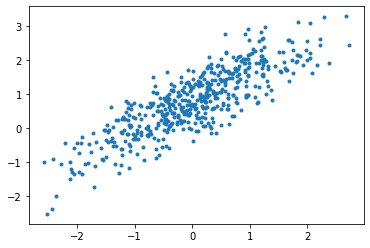

In [3]:
# Plot
plt.plot(x_train, y_train, '.')

In [4]:
# Random initialize the weights
w_init = np.random.normal(0, np.std(x_train), 2) #(center, sd, size)

In [15]:
learning_rate = 1e-3
iteration = 3000

b0, b1 = w_init[0], w_init[1]
loss = np.zeros(iteration)

for i in range(iteration):
    # Get the output prediction
    y_pred = b0 * np.ones(x_train.shape[0]) + b1 * x_train
    
    # Calculating training loss by MSE
    loss[i] = MSE(y_train, y_pred)

    # Calculating the gradients and updating the weights
    b0, b1 = grad(x_train, y_train, y_pred, b0, b1)

In [6]:
# Calculating training loss by MSE
def MSE(y, y_pred):
    loss = np.sum(np.power((y - y_pred), 2)) / y.shape[0]
    return loss

In [7]:
# Calculating the gradients and updating the weights
def grad(x, y, y_pred, b0, b1):
    db0 = np.sum(-2 * (y - y_pred)) / x.shape[0]
    db1 = np.sum(-2 * np.multiply(x, (y - y_pred))) / x.shape[0]
    b0 = b0 - db0 * learning_rate
    b1 = b1 - db1 * learning_rate
    return b0, b1

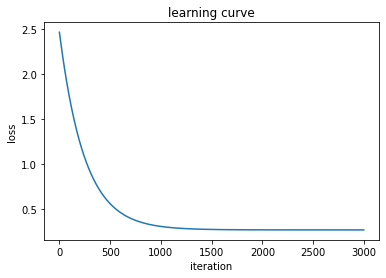

In [16]:
# Plot the Learning Curve
plt.figure()
plt.title('learning curve')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(np.arange(iteration), loss)

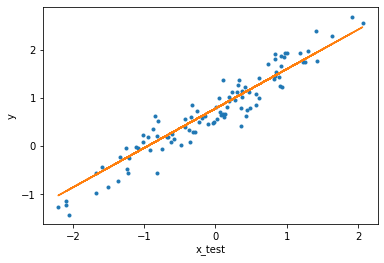

In [17]:
# Test
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

y_pred = b0 * np.ones(x_test.shape[0]) + b1 * x_test

plt.figure()
plt.plot(x_test, y_test, '.')
plt.xlabel('x_test')
plt.ylabel('y')
plt.plot(x_test, y_pred)
plt.show()

In [18]:
print(f'B0 = {b0}, B1 = {b1}')
print(f'MSE = {MSE(y_test, y_pred)}')

B0 = 0.781200792952531, B1 = 0.8172254525782015
MSE = 0.06857232508413452
